# What is a Cloropleth?

Clotoropleth adalah peta tematik yang menggunakan gradasi warna untuk membandingkan wilayah. Pada gambar dibwah ini adalah pta  rata-rata usia penduduk. 
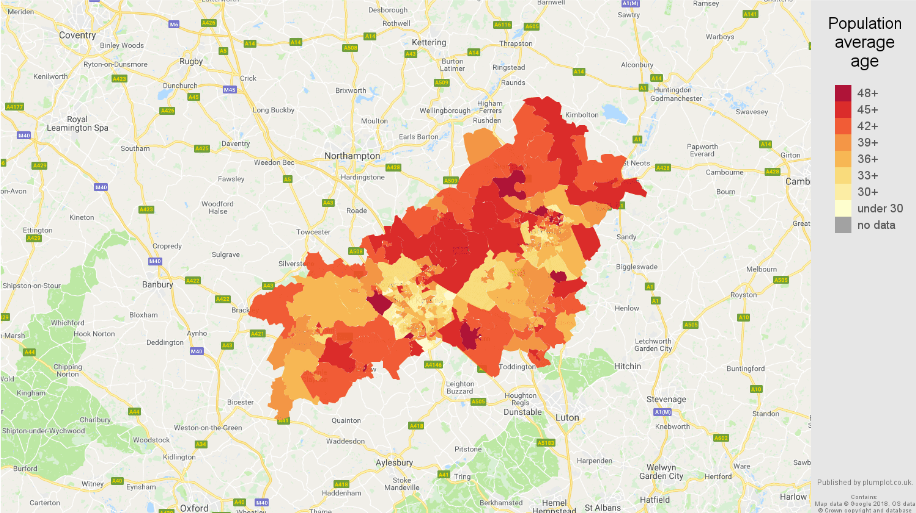

### Exercise 

**Finding counts from a spatial join**

You will be using a dataset of the building permits issued in Nashville during 2017. This DataFrame, called permits, has been pre-loaded for you, along with the council_districts GeoDataFrame.

In [1]:
import geopandas as gpd

In [2]:
permits = gpd.read_file('building_permits_2017.csv')
council_districts = gpd.read_file('council_districts.geojson')

In [3]:
from shapely.geometry import Point

# Create a shapely Point from lat and lng
permits['geometry'] = permits.apply(lambda x: Point((float(x.lng), float(x.lat))), axis=1)

# Build a GeoDataFrame: permits_geo
permits_geo = gpd.GeoDataFrame(permits, crs = council_districts.crs, geometry=permits.geometry)

# Spatial join of permits_geo and council_districts
permits_by_district = gpd.sjoin(permits_geo, council_districts, op='within')
print(permits_by_district.head(2))

# Create permit_counts
permit_counts = permits_by_district.groupby(['district']).size()
print(permit_counts)

     permit_id      issued      cost        lat         lng  \
0   2017032777  2017-05-24  226201.0  36.198241  -86.742235   
68  2017053890  2017-09-05       0.0  36.185442  -86.768239   

                      geometry  index_right first_name  \
0   POINT (-86.74223 36.19824)            5      Scott   
68  POINT (-86.76824 36.18544)            5      Scott   

                        email     res_phone     bus_phone last_name  \
0   scott.davis@nashville.gov  615-554-9730  615-862-6780     Davis   
68  scott.davis@nashville.gov  615-554-9730  615-862-6780     Davis   

          position district  
0   Council Member        5  
68  Council Member        5  
district
1     146
10    119
11    239
12    163
13    139
14    261
15    322
16    303
17    786
18    287
19    969
2     399
20    799
21    569
22    291
23    206
24    458
25    435
26    179
27    105
28    119
29    154
3     215
30     79
31    134
32    225
33    355
34    218
35    192
4     139
5     452
6     455
7 

C:\Users\Akmal Hasan\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


> Great! Now you have a count of building permits issued for each council district. Next you'll get the area of each council_district.

**Council district areas and permit counts** 

In order to create a normalized value for the building permits issued in each council district, you will need to find the area of each council district. Remember that you can leverage the area attribute of a GeoSeries to do this. You will need to convert permit_counts to a DataFrame so you can merge it with the council_districts data. Both permit_counts and council_districts are available for you.

- Get the area of each council district and store it in a new column, area, in the council_districts GeoDataFrame. Print the first two rows.

In [4]:
# Create an area column in council_districts
council_districts['area'] = council_districts.area
print(council_districts.head(2))

C:\Users\Akmal Hasan\AppData\Local\Temp\ipykernel_11052\335165951.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  council_districts['area'] = council_districts.area


  first_name                           email     res_phone     bus_phone  \
0       Nick     nick.leonardo@nashville.gov  615-509-6334  615-862-6780   
1    DeCosta  decosta.hastings@nashville.gov  615-779-1565  615-862-6780   

  last_name        position district  \
0  Leonardo  Council Member        1   
1  Hastings  Council Member        2   

                                            geometry      area  
0  MULTIPOLYGON (((-86.90738 36.39052, -86.90725 ...  0.022786  
1  MULTIPOLYGON (((-86.75902 36.23091, -86.75909 ...  0.002927  


- Next convert permit_counts to a DataFrame with the .to_frame() method, and print the first two rows.



In [5]:
# Convert permit_counts to a DataFrame
permits_df = permit_counts.to_frame()
print(permits_df.head(2))

            0
district     
1         146
10        119


- Reset the index using the inplace = True argument and set the columns attribute to a list with the names district and bldg_permits. Print the first two rows again to see what permits_df looks like now.

In [6]:
# Reset index and column names
permits_df.reset_index(inplace=True)
permits_df.columns = ['district', 'bldg_permits']
print(permits_df.head(2))

  district  bldg_permits
0        1           146
1       10           119


- Create a new GeoDataFrame called districts_and_permits by merging council_districts and permits_df on the district column. Take a look at the first two rows.

In [7]:
import pandas as pd

# Merge council_districts and permits_df: 
districts_and_permits = pd.merge(council_districts, permits_df, on = 'district')
print(districts_and_permits.head(2))

  first_name                           email     res_phone     bus_phone  \
0       Nick     nick.leonardo@nashville.gov  615-509-6334  615-862-6780   
1    DeCosta  decosta.hastings@nashville.gov  615-779-1565  615-862-6780   

  last_name        position district  \
0  Leonardo  Council Member        1   
1  Hastings  Council Member        2   

                                            geometry      area  bldg_permits  
0  MULTIPOLYGON (((-86.90738 36.39052, -86.90725 ...  0.022786           146  
1  MULTIPOLYGON (((-86.75902 36.23091, -86.75909 ...  0.002927           399  


> That's great work! You have created a column with the area in the council_districts Geo DataFrame and built a DataFrame from the permit_counts. You have merged all the information into a single GeoDataFrame. Next you will calculate the permits by area for each council district.

**Calculating a normalized metric**

Now you are ready to divide the number of building permits issued for projects in each council district by the area of that district to get a normalized value for the permits issued. First you will verify that the districts_and_permits is still a GeoDataFrame.

- Print the type() of districts_and_permits.
- Add one more column to districts_and_permits. Use a lambda expression and the pandas apply() method to divide the number of building permits issued for projects in each council district by the area of that district to get a normalized value for the permits issued.
- Print the first five rows of districts_and_permits.

In [8]:
# Print the type of districts_and_permits
print(type(districts_and_permits))

# Create a permit_density column in districts_and_permits
districts_and_permits['permit_density'] = districts_and_permits.apply(lambda row: row.bldg_permits / row.area, axis = 1)

# Print the head of districts_and_permits
print(districts_and_permits.head())



<class 'geopandas.geodataframe.GeoDataFrame'>
  first_name                           email     res_phone     bus_phone  \
0       Nick     nick.leonardo@nashville.gov  615-509-6334  615-862-6780   
1    DeCosta  decosta.hastings@nashville.gov  615-779-1565  615-862-6780   
2      Nancy    nancy.vanreece@nashville.gov  615-576-0488  615-862-6780   
3       Bill    bill.pridemore@nashville.gov  615-915-1419  615-862-6780   
4     Robert      robert.swope@nashville.gov  615-308-0577  615-862-6780   

   last_name        position district  \
0   Leonardo  Council Member        1   
1   Hastings  Council Member        2   
2   VanReece  Council Member        8   
3  Pridemore  Council Member        9   
4      Swope  Council Member        4   

                                            geometry      area  bldg_permits  \
0  MULTIPOLYGON (((-86.90738 36.39052, -86.90725 ...  0.022786           146   
1  MULTIPOLYGON (((-86.75902 36.23091, -86.75909 ...  0.002927           399   
2  MULTIPO

> Excellent! Now that you have created a normalized value to look at building permits in each council district, let's go learn how to plot a choropleth.

## Cloropleth with Geopandas 

### Exercise 

**Geopandas choropleths**

First you will plot a choropleth of the building permit density for each council district using the default colormap. Then you will polish it by changing the colormap and adding labels and a title.

- Import matplotlib.pyplot, pandas, and geopandas with the customary aliases.

In [9]:
# Import packages
import matplotlib.pyplot as plt 
import pandas as pd
import geopandas as gpd

- Plot districts_and_permits, using the permit_density column you just created and the default colormap. Be sure to call plt.show().

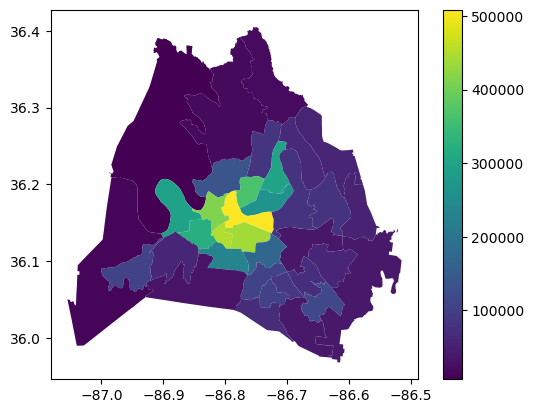

In [10]:
# Simple plot of building permit_density
districts_and_permits.plot(column = 'permit_density', legend = True);
plt.show();


- Create a more polished choropleth of permit_density. Use the BuGn colormap, outline the polygons in black, create axis labels (longitude and latitude), and a title('2017 Building Project Density by Council District'). Show the plot.

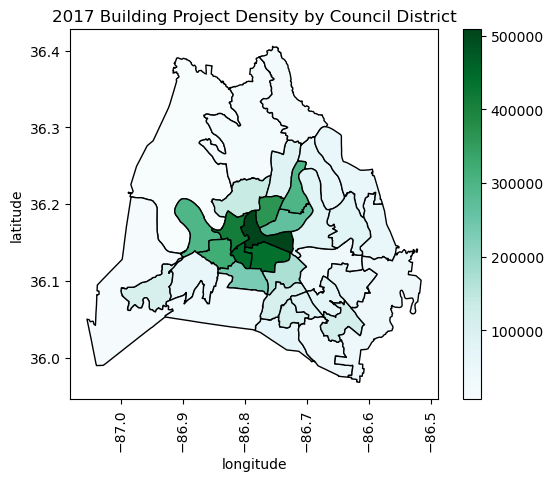

In [11]:
# Polished choropleth of building permit_density 
districts_and_permits.plot(column = 'permit_density', cmap = 'BuGn', edgecolor = 'black', legend = True)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.xticks(rotation = 'vertical')
plt.title('2017 Building Project Density by Council District')
plt.show();

> Very nice! You can see that most development has happened close to the city center! The scale for permit density is hard to interpret. We'll fix that next.

**Area in km squared, geometry in decimal degrees**

In this exercise, you'll start again with the council_districts GeoDataFrame and the permits DataFrame. You will change the council_districts to use the EPSG 3857 coordinate reference system before creating a column for area. Once the area column has been created, you will change the CRS back to EPSG 4326 so that the geometry is in decimal degrees.

- Change the coordinate reference system for the council_districts to EPSG 3857, and print the crs and first two rows again.
- Create a column called area. Divide the area of each polygon by sqm_to_sqkm to get the area in kilometers squared.
- Change the coordinate reference system for the council_districts back to EPSG 4326. Print the crs and first two rows.

In [12]:
# Change council_districts crs to epsg 3857
council_districts = council_districts.to_crs(epsg=3857)
print(council_districts.crs)
print(council_districts.head())

# Create area in square km
sqm_to_sqkm = 10 ** 6
council_districts['area'] = council_districts.geometry.area / sqm_to_sqkm

# Change council_districts crs back to epsg 4326
council_districts = council_districts.to_crs(epsg=4326)
print(council_districts.crs)
print(council_districts.head())

EPSG:3857
  first_name                           email     res_phone     bus_phone  \
0       Nick     nick.leonardo@nashville.gov  615-509-6334  615-862-6780   
1    DeCosta  decosta.hastings@nashville.gov  615-779-1565  615-862-6780   
2      Nancy    nancy.vanreece@nashville.gov  615-576-0488  615-862-6780   
3       Bill    bill.pridemore@nashville.gov  615-915-1419  615-862-6780   
4     Robert      robert.swope@nashville.gov  615-308-0577  615-862-6780   

   last_name        position district  \
0   Leonardo  Council Member        1   
1   Hastings  Council Member        2   
2   VanReece  Council Member        8   
3  Pridemore  Council Member        9   
4      Swope  Council Member        4   

                                            geometry      area  
0  MULTIPOLYGON (((-9674485.565 4354489.556, -967...  0.022786  
1  MULTIPOLYGON (((-9657970.373 4332440.650, -965...  0.002927  
2  MULTIPOLYGON (((-9654572.680 4339671.152, -965...  0.002517  
3  MULTIPOLYGON (((-964993

> Good! The council_districts have area in kilometers squared and geometry measures in decimal degrees. Let's go join it to the permits.

**Spatially joining and getting counts**

You will continue preparing your dataset for plotting a geopandas choropleth by creating a GeoDataFrame of the building permits spatially joined to the council districts. After that, you will be able to get counts of the building permits issued in each council district.

- Create permits_geo from permits, the council_districts.crs, and the geometry in permits.
- Spatially join permits_geo and the council_districts to get building permits within each council district. Call this permits_by_district.
- Count permits in each district, permit_counts, by chaining groupby() and size() methods.
- Create counts_df from permit_counts. Reset the index, and name the columns district and bldg_permits.

In [13]:
# Create permits_geo
permits_geo = gpd.GeoDataFrame(permits, crs=council_districts.crs, geometry=permits.geometry)

# Spatially join permits_geo and council_districts
permits_by_district = gpd.sjoin(permits_geo, council_districts, op='within')

# Count permits in each district
permits_counts = permits_by_district.groupby(['district']).size()

# Convert permit_counts to a df with 2 columns: district and bldg_permits
counts_df = permits_counts.to_frame()
counts_df.reset_index(inplace=True)
counts_df.columns = ['district', 'bldg_permits']
print(counts_df.head(2))

  district  bldg_permits
0        1           146
1       10           119


C:\Users\Akmal Hasan\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


> You have done all the work to get the area units in km squared, latitude and longitude in decimal degrees, and a count of building permits issued for each council district all in the same dataset. All that's left is to calculate a normalized value and plot the choropleth!

**Building a polished Geopandas choropleth**

After merging the counts_df with permits_by_district, you will create a column with normalized permit_density by dividing the count of permits in each council district by the area of that council district. Then you will plot your final geopandas choropleth of the building projects in each council district.

- Merge permits_by_district and counts_df on district to create districts_and_permits.
- Using apply() and a lambda expression, calculate a new column in districts_and_permits called permit_density. Divide counts by areas.
- Plot a choropleth of the districts_and_permits, using permit_density with the OrRd colormap, and black outlines.
- Add axis labels (longitude and latitude) and the title provided. Show your plot.

    permit_id      issued      cost        lat         lng  \
0  2017032777  2017-05-24  226201.0  36.198241  -86.742235   
1  2017053890  2017-09-05       0.0  36.185442  -86.768239   

                     geometry  index_right first_name  \
0  POINT (-86.74223 36.19824)            5      Scott   
1  POINT (-86.76824 36.18544)            5      Scott   

                       email     res_phone     bus_phone last_name  \
0  scott.davis@nashville.gov  615-554-9730  615-862-6780     Davis   
1  scott.davis@nashville.gov  615-554-9730  615-862-6780     Davis   

         position district       area  bldg_permits  permit_density  
0  Council Member        5  19.030612           452       23.751207  
1  Council Member        5  19.030612           452       23.751207  


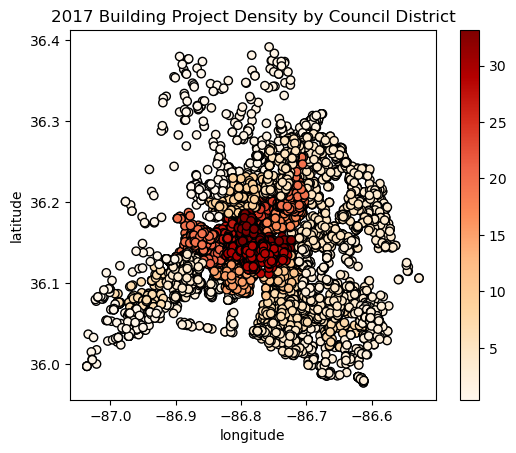

In [14]:
# Merge permits_by_district and counts_df
districts_and_permits = pd.merge(permits_by_district, counts_df, on = 'district')

# Create permit_density column
districts_and_permits['permit_density'] = districts_and_permits.apply(lambda row: row.bldg_permits / row.area, axis = 1)
print(districts_and_permits.head(2))

# Create choropleth plot
districts_and_permits.plot(column = 'permit_density', cmap = 'OrRd', edgecolor = 'black', legend = True)

# Add axis labels and title
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('2017 Building Project Density by Council District')
plt.show()

> That's terrific! You can see the relative density of permitted building projects for the council districts.

## Cloropleth with Folium

### Exercise 

**Folium choropleth**

In this exercise, you will construct a folium choropleth to show the density of permitted construction projects in different Nashville council districts. You will be using a single data source, the districts_and_permits GeoDataFrame, which has been pre-loaded for you.

- Create a map object m using the nashville point for location and a zoom_start of 10.

In [15]:
import folium

In [16]:
# Center point for Nashville
nashville = [36.1636,-86.7823]

# Create map
m = folium.Map(location=nashville, zoom_start=10)

- Use districts_and_permits: geometry for polygons, district & permit_density to color. Use Reds and 0.5 opacity for the fill; Set line_opacity to 1.0.
- Set key_on to feature.properties.district. Use the title provided.

In [17]:
# Build choropleth
folium.Choropleth(
    geo_data=districts_and_permits,
    name='geometry',
    data=districts_and_permits,
    columns=['district', 'permit_density'],
    key_on='feature.properties.district',
    fill_color='Reds',
    fill_opacity=0.5,
    line_opacity=1.0,
    legend_name='2017 Permitted Building Projects per km squared'
).add_to(m)

- Next create and add a folium LayerControl(). Display the map.

In [18]:
# Create LayerControl and add it to the map            
folium.LayerControl().add_to(m)

m.save('permits_choropleth.html')

**Folium choropleth with markers and popups**

Now you will add a marker to the center of each council district that shows the district number along with the count of building permits issued in 2017 for that district. The map you created in the last exercise is available as m.

- Find the centroid for each council district and store it in a new column, center in the districts_and_permits GeoDataFrame.
- Iterate through districts_and_permits and add a marker at each district's center. Remember to reverse the coordinate pair.
- Create popups within your for loop to display the district number and the count of permits issued.
- Add the markers to your map with .add_to() and display it.

In [19]:
# Create center column for the centroid of each district
districts_and_permits['center'] = districts_and_permits.geometry.centroid

distinct = []
# Build markers and popups
for row in districts_and_permits.iterrows():
    row_values = row[1] 
    if row_values['district'] not in distinct:
        center_point = row_values['center']
        location = [center_point.y, center_point.x]
        popup = ('Council District: ' + str(row_values['district']) + 
             ';  ' + 'permits issued: ' + str(row_values['bldg_permits']))
        marker = folium.Marker(location = location, popup = popup)
        marker.add_to(m)
        distinct.append(row_values['district'])
    
# Display the map
m.save('permits_choropleth2.html')

C:\Users\Akmal Hasan\AppData\Local\Temp\ipykernel_11052\2306617030.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  districts_and_permits['center'] = districts_and_permits.geometry.centroid


> Well done! Your choropleth of building permits by Council Districts is very informative! Not only can we see the relative density of project work amongst districts, we can also see which district is which and what the total count of projects was for that district.